## Imports

In [71]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

## Settings

In [72]:
imdir = '/home/drevital/obstacles_classification_datasets/test/no_mask'
imname = '46_2040_1.00_2022-12-13--11-14-28_'
in_name = imname + '.jpg'
outdir = '/home/drevital/obstacles_classification_datasets/test/mask'
out_name = imname + 'pre_train.jpg'
out_path = os.path.join(outdir, out_name)
threshold = 60

# Read image & separate it to <ref, current>

In [73]:
imrgb = cv2.imread(os.path.join(imdir, in_name))
im = cv2.cvtColor(imrgb, cv2.COLOR_BGR2RGB)        
w = im.shape[1]
ref = im[:, :w//2]
current = im[:, w//2:]

In [74]:
imrgb

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  3,   3,   3],
        [  2,   2,   2],
        [  3,   3,   3]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  0,   0,   0],
        [  4,   4,   4]],

       ...,

       [[ 65,  59,  64],
        [ 95,  89,  94],
        [ 85,  79,  84],
        ...,
        [113, 108, 110],
        [133, 128, 129],
        [150, 145, 146]],

       [[ 69,  63,  68],
        [ 97,  91,  96],
        [ 82,  76,  81],
        ...,
        [141, 136, 138],
        [125, 120, 121],
        [144, 139, 140]],

       [[ 50,  44,  49],
        [ 80,  74,  79],
        [ 66,  60,  65],
        ...,
        [153, 148, 150],
        [118, 113, 114],
        [139, 134, 135]]

## Generate diff & mask images

In [75]:
diff = cv2.absdiff(current, ref)
agg_rgb = np.stack((diff[:, :, 0], diff[:, :, 1], diff[:, :, 2])).max(0)
_, mask = cv2.threshold(agg_rgb, threshold, 255, cv2.THRESH_BINARY)

# old morphological operations
copyImg = cv2.erode(mask, np.ones((3, 3), np.uint8), iterations=1)  # reduce noise
copyImg = cv2.dilate(copyImg, np.ones((7, 7), np.uint8), iterations=1)
copyImg = cv2.erode(copyImg, np.ones((5, 5), np.uint8), iterations=1)
copyImg = cv2.dilate(copyImg, np.ones((9, 9), np.uint8), iterations=1)
kernel = np.ones((11, 11), np.uint8)  # kernel for dilation

# increase area to an object
copyImg = cv2.dilate(copyImg, kernel, iterations=2)
copyImg = cv2.dilate(copyImg, np.ones((13, 13), np.uint8), iterations=1)
copyImg = cv2.erode(copyImg, np.ones((11, 11), np.uint8), iterations=1)
copyImg = cv2.erode(copyImg, np.ones((5, 5), np.uint8), iterations=1)

mask = copyImg
 
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)        

## Concatenate <ref, current, mask> for training

In [76]:
concat = cv2.hconcat([ref, current, mask])

## Display concatenated image

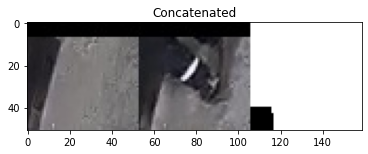

In [77]:
plt.imshow(concat)
plt.title('Concatenated')
plt.show()

## Save the geerated image

In [78]:
concat = cv2.cvtColor(concat, cv2.COLOR_BGR2RGB)        
cv2.imwrite(out_path, concat)

True

In [79]:
concat.shape

(51, 159, 3)